<a href="https://colab.research.google.com/github/ajaysriram-25/AIML/blob/main/Coursera_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

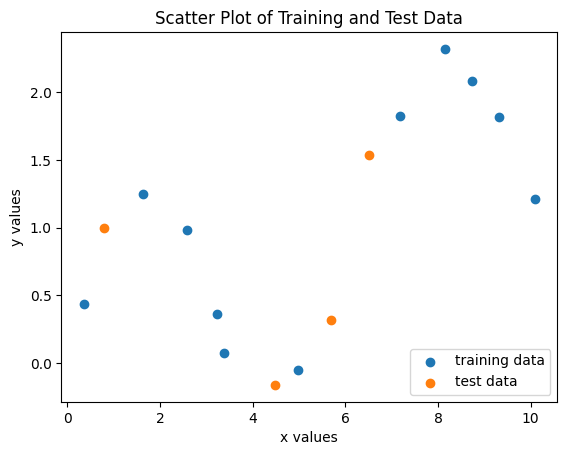

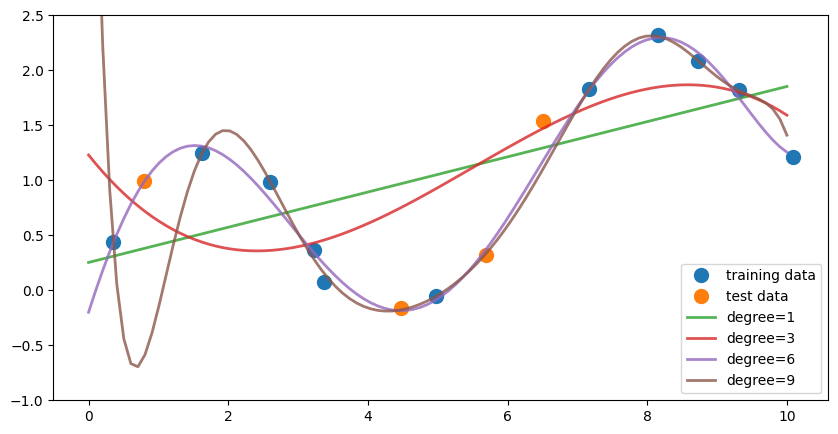

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline


# Generate random data
np.random.seed(0)
n = 15
x = np.linspace(0, 10, n) + np.random.randn(n) / 5
y = np.sin(x) + x / 6 + np.random.randn(n) / 10

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Scatter plot function
def part1_scatter():
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4)
    plt.xlabel("x values")
    plt.ylabel("y values")
    plt.title("Scatter Plot of Training and Test Data")
    plt.show()  # Show plot interactively

# Call the function
part1_scatter()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Data generation
np.random.seed(0)
n = 15
x = np.linspace(0, 10, n) + np.random.randn(n) / 5
y = np.sin(x) + x / 6 + np.random.randn(n) / 10

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Function to calculate predictions
def answer_one():
    result = np.zeros((4, 100))
    test = np.linspace(0, 10, 100)
    for i, degree in enumerate([1, 3, 6, 9]):
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X_train.reshape(-1, 1))
        linreg = LinearRegression().fit(X_poly, y_train)
        y = linreg.predict(poly.fit_transform(test.reshape(-1, 1)))
        result[i, :] = y
    return result

# Function to plot results
def plot_one(degree_predictions):
    plt.figure(figsize=(10, 5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i, degree in enumerate([1, 3, 6, 9]):
        plt.plot(np.linspace(0, 10, 100),
                 degree_predictions[i],
                 alpha=0.8,
                 lw=2,
                 label=f'degree={degree}')
    plt.ylim(-1, 2.5)
    plt.legend(loc=4)
    plt.show()

# Call the functions
plot_one(answer_one())

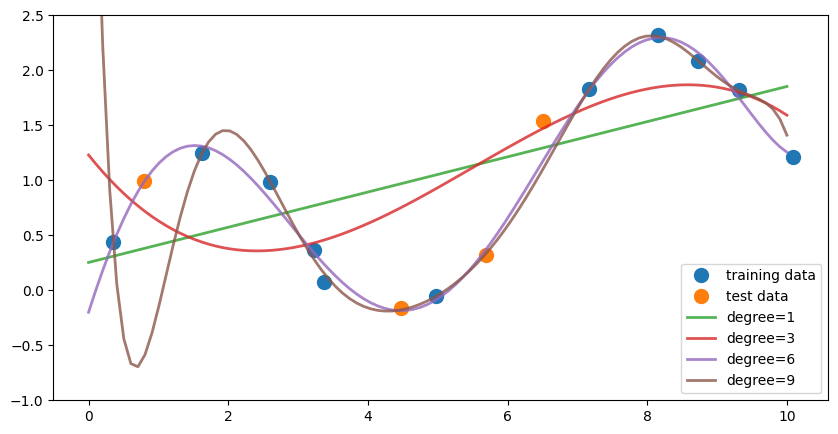

In [2]:
# feel free to use the function plot_one() to replicate the figure
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())


In [3]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    import numpy as np

    r2_test = np.zeros(10)
    r2_train = np.zeros(10)
    for degree in range(10):
        # Train polynomial linear regression
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
        linreg = LinearRegression().fit(X_train_poly, y_train)

        # Evaluate the polynomial linear regression
        r2_train[degree] = linreg.score(X_train_poly, y_train)

        X_test_poly = poly.transform(X_test.reshape(-1, 1))
        r2_test[degree] = linreg.score(X_test_poly, y_test)

    return (r2_train, r2_test)

# Call the function
r2_train, r2_test = answer_two()
print("R^2 values for training set:", r2_train)
print("R^2 values for test set:", r2_test)

R^2 values for training set: [0.         0.42924578 0.4510998  0.58719954 0.91941945 0.97578641
 0.99018233 0.99352509 0.99637545 0.99803706]
R^2 values for test set: [-0.47808642 -0.45237104 -0.06856984  0.00533105  0.73004943  0.87708301
  0.9214094   0.92021504  0.63247948 -0.64525365]


In [4]:
def answer_three():
    Underfitting, Overfitting, Good_Generalization = 0, 9, 7
    return (Underfitting, Overfitting, Good_Generalization)
answer_three()

(0, 9, 7)

In [5]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import LinearRegression, Lasso
    from sklearn.metrics import r2_score
    import numpy as np

    # Generate polynomial features of degree 12
    poly = PolynomialFeatures(degree=12)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.transform(X_test.reshape(-1, 1))

    # Train a non-regularized LinearRegression model
    linreg = LinearRegression().fit(X_train_poly, y_train)

    # Train a Lasso Regression model with specified parameters
    linlasso = Lasso(alpha=0.01, max_iter=10000, tol=0.1, random_state=0).fit(X_train_poly, y_train)

    # Calculate R^2 scores on the test set for both models
    linreg_r2 = linreg.score(X_test_poly, y_test)
    linlasso_r2 = linlasso.score(X_test_poly, y_test)

    return linreg_r2, linlasso_r2

# Call the function (ensure X_train, X_test, y_train, and y_test are defined beforehand)
# answer_four()

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('assets/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

FileNotFoundError: [Errno 2] No such file or directory: 'assets/mushrooms.csv'

In [7]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier
    import pandas as pd

    # Train a DecisionTreeClassifier with default parameters and random_state=0
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train2, y_train2)

    # Create a DataFrame for feature importance
    feature_importances = pd.DataFrame({
        'feature': X_train2.columns,
        'importance': clf.feature_importances_
    })

    # Sort by importance in descending order and select the top 5 features
    top_features = (feature_importances
                    .sort_values(by='importance', ascending=False)
                    .head(5)['feature']
                    .tolist())

    return top_features

# Call the function and print the result
result = answer_five()
print("Top 5 Most Important Features:", result)

NameError: name 'X_train2' is not defined

Mean Train Scores: [0.60093472 0.74521333 0.88489371 1.         1.         1.        ]
Mean Test Scores: [0.58793821 0.69904932 0.83006536 0.82055853 0.5389186  0.60754605]


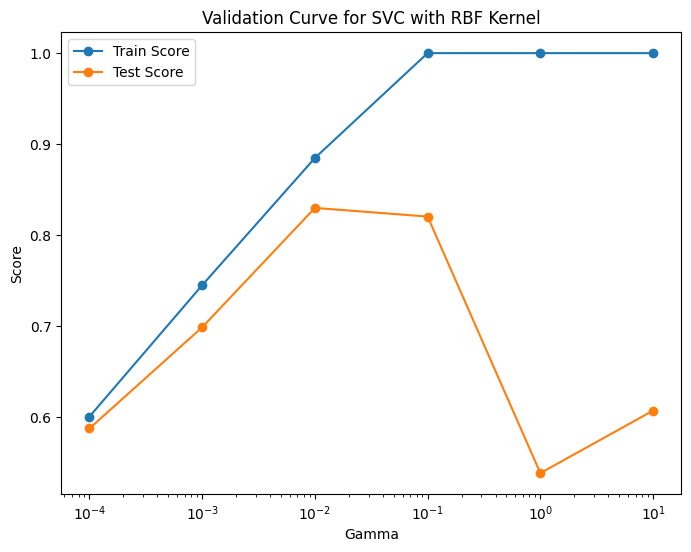

In [8]:
# Required imports
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate synthetic data (replace with your actual data)
X_subset, y_subset = make_classification(n_samples=100, n_features=20, random_state=0)

# Define the function for validation curve
def answer_six():
    # Define the range of gamma values to test
    param_range = np.logspace(-4, 1, 6)

    # Perform validation curve with 3-fold cross-validation and 2 jobs in parallel
    train_scores, test_scores = validation_curve(
        SVC(kernel='rbf', C=1, random_state=0),  # SVC with RBF kernel
        X_subset,  # Features
        y_subset,  # Target variable
        param_name='gamma',  # Parameter to vary (gamma in RBF kernel)
        param_range=param_range,  # Range of gamma values
        cv=3,  # 3-fold cross-validation
        n_jobs=2  # Parallel jobs for faster computation
    )

    # Calculate mean scores across the 3 folds for both training and test sets
    mean_train_scores = np.mean(train_scores, axis=1)
    mean_test_scores = np.mean(test_scores, axis=1)

    # Return the mean training and test scores as a tuple of numpy arrays
    return mean_train_scores, mean_test_scores

# Call the function and get the results
mean_train_scores, mean_test_scores = answer_six()

# Display the results
print("Mean Train Scores:", mean_train_scores)
print("Mean Test Scores:", mean_test_scores)

# Optional: Plotting the results to visualize the effect of gamma
plt.figure(figsize=(8, 6))
plt.plot(np.logspace(-4, 1, 6), mean_train_scores, label='Train Score', marker='o')
plt.plot(np.logspace(-4, 1, 6), mean_test_scores, label='Test Score', marker='o')
plt.xscale('log')
plt.xlabel('Gamma')
plt.ylabel('Score')
plt.title('Validation Curve for SVC with RBF Kernel')
plt.legend()
plt.show()

In [9]:
def answer_seven():

    #train_scores, test_scores = answer_six()
    #plt.figure()
    #plt.plot(np.logspace(-4,1,6),train_scores,'b',label='Training scores')
    #plt.plot(np.logspace(-4,1,6),test_scores,'r',label='Test scores')
    #plt.xscale('log') # Sets x axis to a log scale.
    #plt.xlabel('Gamma')
    #plt.ylabel('Scores')
    #plt.legend()

    return (0.0001,10,0.1)

answer_seven()

(0.0001, 10, 0.1)